<a href="https://colab.research.google.com/github/jnielsonresearch/crunch-time-analytics/blob/main/Hustle%20Stats%20Research/Classification_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification ML Models

## Importing the libraries

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [1]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [2]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas.util.testing as tm

In [4]:
# Plotting configuration for Jupyter notebook
%matplotlib inline
import matplotlib as mpl
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## Importing the dataset

In [3]:
# Download the data
import os
datapath = os.path.join("Data", "")

files = ['playoff_boxscores.csv', 'team_box_hustle.csv']
  
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/jnielsonresearch/crunch-time-analytics/main/Hustle%20Stats%20Research/"
os.makedirs(datapath, exist_ok=True)
for filename in files:
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "Data/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

playoff_boxscores = pd.read_csv(datapath + files[0])
team_box_hustle = pd.read_csv(datapath + files[1])

In [4]:
playoff_boxscores.head()

SEASON_ID     TEAM_ID TEAM_ABBREVIATION       TEAM_NAME   GAME_ID  \
0      42019  1610612738               BOS  Boston Celtics  41900306   
1      42019  1610612738               BOS  Boston Celtics  41900305   
2      42019  1610612738               BOS  Boston Celtics  41900304   
3      42019  1610612738               BOS  Boston Celtics  41900303   
4      42019  1610612738               BOS  Boston Celtics  41900302   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  OREB  DREB  REB  AST  STL  BLK  \
0  2020-09-27    BOS @ MIA  L  240  113  ...    13    29   42   26    7    2   
1  2020-09-25  BOS vs. MIA  W  238  121  ...    13    37   50   29    7    4   
2  2020-09-23    BOS @ MIA  L  239  109  ...    12    34   46   28    3    5   
3  2020-09-19    BOS @ MIA  W  240  117  ...    10    40   50   27    8    3   
4  2020-09-17  BOS vs. MIA  L  240  101  ...     6    35   41   19    5    3   

   TOV  PF  PLUS_MINUS   SEASON  
0   10  21       -12.0  2019-20  
1   11  23        13.0  2019-20  
2   19  24         0.2  2019-20  
3   14  29         8.4  2019-20  
4   20  22        -5.0  2019-20  

[5 rows x 29 columns]

In [5]:
team_box_hustle.head()

GAME_ID     TEAM_ID TEAM_NAME TEAM_ABBREVIATION      TEAM_CITY  \
0  41900301  1610612748      Heat               MIA          Miami   
1  41900301  1610612738   Celtics               BOS         Boston   
2  41600162  1610612760   Thunder               OKC  Oklahoma City   
3  41600162  1610612745   Rockets               HOU        Houston   
4  41800102  1610612765   Pistons               DET        Detroit   

         MINUTES  PTS  CONTESTED_SHOTS  CONTESTED_SHOTS_2PT  \
0  265.000000:00  117               67                   34   
1  265.000000:00  114               53                   31   
2  240.000000:00  111               72                   46   
3  240.000000:00  115               67                   45   
4  240.000000:00   99               61                   38   

   CONTESTED_SHOTS_3PT  ...  SCREEN_ASSISTS  SCREEN_AST_PTS  \
0                   33  ...               7              18   
1                   22  ...               6              13   
2                   26  ...              14              31   
3                   22  ...              10              23   
4                   23  ...               7              18   

   OFF_LOOSE_BALLS_RECOVERED  DEF_LOOSE_BALLS_RECOVERED  \
0                          7                          3   
1                          4                          6   
2                          0                          0   
3                          0                          0   
4                          2                          2   

   LOOSE_BALLS_RECOVERED  OFF_BOXOUTS  DEF_BOXOUTS  BOX_OUT_PLAYER_TEAM_REBS  \
0                     10            4           17                        16   
1                     10            1           13                         7   
2                     18            0            0                         0   
3                     16            0            0                         0   
4                      4            3           16                         6   

   BOX_OUT_PLAYER_REBS  BOX_OUTS  
0                    4        21  
1                    0        14  
2                    0         0  
3                    0         0  
4                    3        19  

[5 rows x 22 columns]

In [6]:
# Drop duplicate columns in team_box_hustle dataset 
cols = ['GAME_ID', 'TEAM_ID','CONTESTED_SHOTS', 'CONTESTED_SHOTS_2PT',
       'CONTESTED_SHOTS_3PT', 'DEFLECTIONS', 'CHARGES_DRAWN', 'SCREEN_ASSISTS',
       'SCREEN_AST_PTS', 'OFF_LOOSE_BALLS_RECOVERED',
       'DEF_LOOSE_BALLS_RECOVERED', 'LOOSE_BALLS_RECOVERED', 'OFF_BOXOUTS',
       'DEF_BOXOUTS', 'BOX_OUT_PLAYER_TEAM_REBS', 'BOX_OUT_PLAYER_REBS',
       'BOX_OUTS']
team_box_hustle = team_box_hustle[cols]

In [7]:
# Merge playoff_boxscores and team_box_hustle datasets on GAME_ID
hustle_stats = playoff_boxscores.merge(team_box_hustle, how='inner', on=['GAME_ID', 'TEAM_ID'])

In [8]:
hustle_stats.columns

Index(['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'SEASON',
       'CONTESTED_SHOTS', 'CONTESTED_SHOTS_2PT', 'CONTESTED_SHOTS_3PT',
       'DEFLECTIONS', 'CHARGES_DRAWN', 'SCREEN_ASSISTS', 'SCREEN_AST_PTS',
       'OFF_LOOSE_BALLS_RECOVERED', 'DEF_LOOSE_BALLS_RECOVERED',
       'LOOSE_BALLS_RECOVERED', 'OFF_BOXOUTS', 'DEF_BOXOUTS',
       'BOX_OUT_PLAYER_TEAM_REBS', 'BOX_OUT_PLAYER_REBS', 'BOX_OUTS'],
      dtype='object')

In [9]:
hustle_stats.head()

SEASON_ID     TEAM_ID TEAM_ABBREVIATION       TEAM_NAME   GAME_ID  \
0      42019  1610612738               BOS  Boston Celtics  41900306   
1      42019  1610612738               BOS  Boston Celtics  41900305   
2      42019  1610612738               BOS  Boston Celtics  41900304   
3      42019  1610612738               BOS  Boston Celtics  41900303   
4      42019  1610612738               BOS  Boston Celtics  41900302   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  SCREEN_ASSISTS  SCREEN_AST_PTS  \
0  2020-09-27    BOS @ MIA  L  240  113  ...               6              14   
1  2020-09-25  BOS vs. MIA  W  238  121  ...               9              23   
2  2020-09-23    BOS @ MIA  L  239  109  ...               4              10   
3  2020-09-19    BOS @ MIA  W  240  117  ...               4               9   
4  2020-09-17  BOS vs. MIA  L  240  101  ...              11              24   

   OFF_LOOSE_BALLS_RECOVERED  DEF_LOOSE_BALLS_RECOVERED  \
0                          2                          4   
1                          2                          3   
2                          2                          2   
3                          3                          4   
4                          7                          2   

   LOOSE_BALLS_RECOVERED  OFF_BOXOUTS  DEF_BOXOUTS  BOX_OUT_PLAYER_TEAM_REBS  \
0                      6            5            6                         8   
1                      5            4            8                        11   
2                      4            3           16                        13   
3                      7            2           11                         8   
4                      9            2            8                         6   

   BOX_OUT_PLAYER_REBS  BOX_OUTS  
0                    4        11  
1                    7        12  
2                    6        19  
3                    2        13  
4                    2        10  

[5 rows x 44 columns]

In [10]:
# Create calculated metric NBA composite "Hustle Rating":
# Formula source: https://grantland.com/the-triangle/how-do-you-measure-hustle-in-the-nba-theres-a-stat-for-that/

# 2-Point Field Goal Contested: A contest decreases the probability of a 2-Point Field Goal going in by .05 x 2.0 Point Value of a 2-Point Field Goal = .1 Hustle Points.

# 3-Point Field Goal Contested: A contest decreases the probability of a 3-Point Field Goal going in by .05 x 3.0 Point Value of a 3-Point Field Goal = .15 Hustle Points.

# Deflection: We estimate that the team whose player deflected the ball has a .25 chance of recovering the ball x 1.0 Expected Point Value for gaining possession = .25 Hustle Points.

# Loose-Ball Recovered: Recovering a loose ball increases the probability of possession by .5 x 1.0 Expected Point Value for gaining possession = .5 Hustle Points.

# Charge: 1.5 Expected Point Value for creating a turnover when the opponent otherwise would have likely taken a very good shot (as most charges take place near the basket) + .25 Expected Point Value by drawing a foul on the opposing player (gets team closer to the bonus and limits opposing player’s ability to play) = 1.75 Hustle Points.

hustle_stats['HUSTLE_RATING'] = hustle_stats.apply(lambda x: x['CONTESTED_SHOTS_2PT']*0.1 + x['CONTESTED_SHOTS_3PT']*0.15 + x['DEFLECTIONS']*0.25 + x['LOOSE_BALLS_RECOVERED']*0.5 + x['CHARGES_DRAWN']*1.5, axis=1)

In [11]:
hustle_stats.head()

SEASON_ID     TEAM_ID TEAM_ABBREVIATION       TEAM_NAME   GAME_ID  \
0      42019  1610612738               BOS  Boston Celtics  41900306   
1      42019  1610612738               BOS  Boston Celtics  41900305   
2      42019  1610612738               BOS  Boston Celtics  41900304   
3      42019  1610612738               BOS  Boston Celtics  41900303   
4      42019  1610612738               BOS  Boston Celtics  41900302   

    GAME_DATE      MATCHUP WL  MIN  PTS  ...  SCREEN_AST_PTS  \
0  2020-09-27    BOS @ MIA  L  240  113  ...              14   
1  2020-09-25  BOS vs. MIA  W  238  121  ...              23   
2  2020-09-23    BOS @ MIA  L  239  109  ...              10   
3  2020-09-19    BOS @ MIA  W  240  117  ...               9   
4  2020-09-17  BOS vs. MIA  L  240  101  ...              24   

   OFF_LOOSE_BALLS_RECOVERED  DEF_LOOSE_BALLS_RECOVERED  \
0                          2                          4   
1                          2                          3   
2                          2                          2   
3                          3                          4   
4                          7                          2   

   LOOSE_BALLS_RECOVERED  OFF_BOXOUTS  DEF_BOXOUTS  BOX_OUT_PLAYER_TEAM_REBS  \
0                      6            5            6                         8   
1                      5            4            8                        11   
2                      4            3           16                        13   
3                      7            2           11                         8   
4                      9            2            8                         6   

   BOX_OUT_PLAYER_REBS  BOX_OUTS  HUSTLE_RATING  
0                    4        11          14.55  
1                    7        12          12.60  
2                    6        19          11.60  
3                    2        13          13.80  
4                    2        10          14.45  

[5 rows x 45 columns]

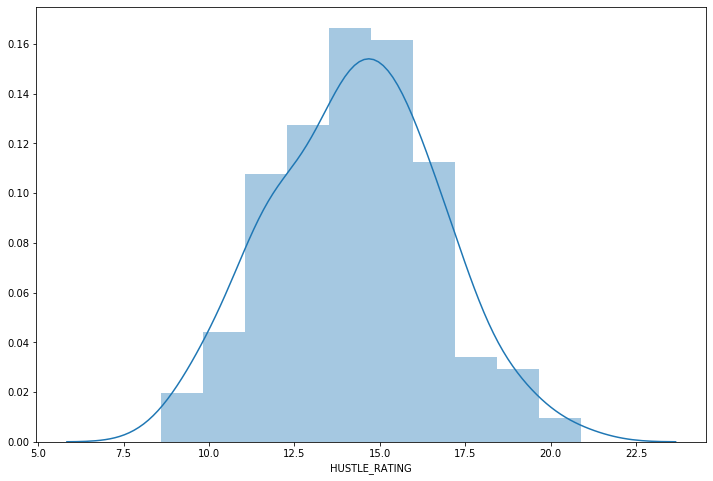

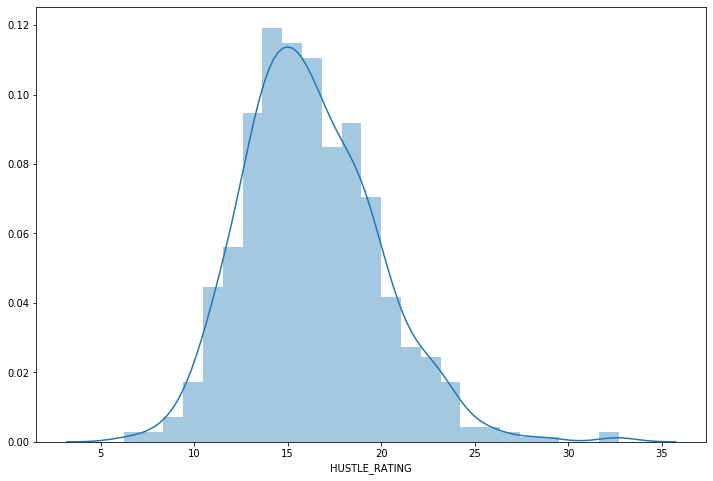

In [18]:
# Distribution plot of hustle_rating for bubble_season and prior_seasons
bubble_season = hustle_stats[(hustle_stats['SEASON'] == '2019-20')]
prior_seasons = hustle_stats[(hustle_stats['SEASON'] != '2019-20')]

plt.figure(figsize=(12,8))
sns.distplot(bubble_season['HUSTLE_RATING'])

plt.figure(figsize=(12,8))
sns.distplot(prior_seasons['HUSTLE_RATING'])

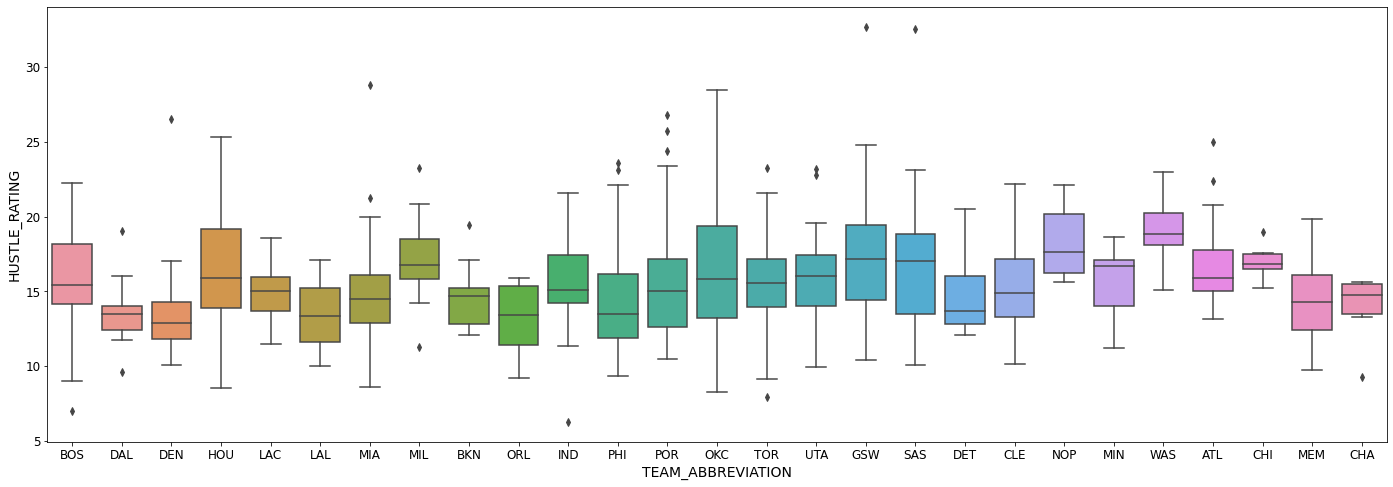

In [15]:
# HUSTLE_RATING BY TEAM
plt.figure(figsize=(24,8))
sns.boxplot(data=hustle_stats, x='TEAM_ABBREVIATION', y='HUSTLE_RATING')

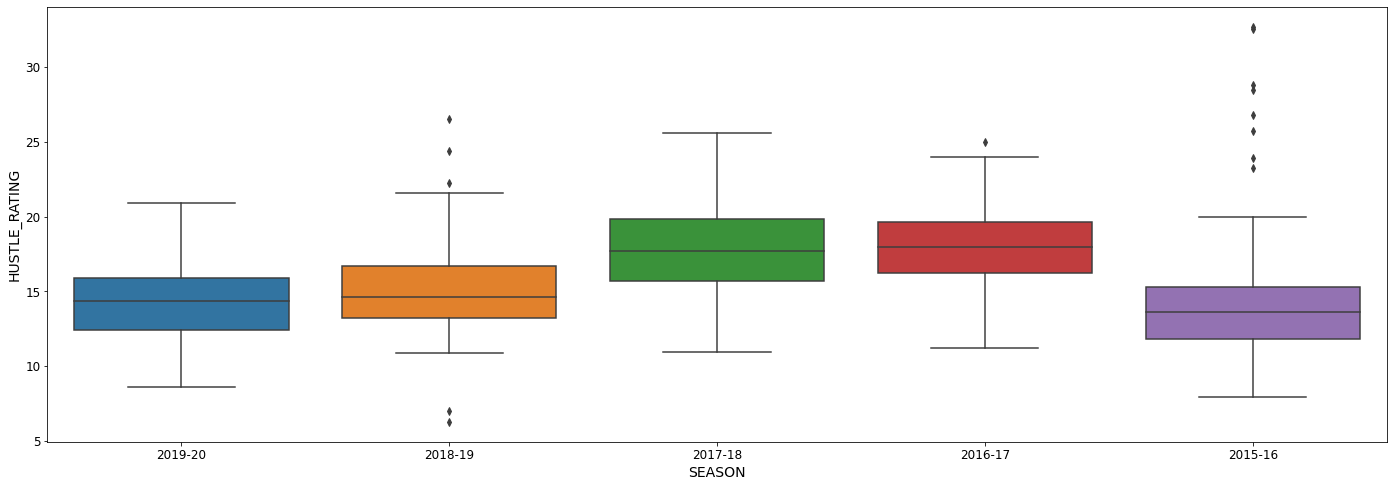

In [16]:
# HUSTLE_RATING BY SEASON
plt.figure(figsize=(24,8))
sns.boxplot(data=hustle_stats, x='SEASON', y='HUSTLE_RATING')

## Correlation Pairplot for Hustle Stats

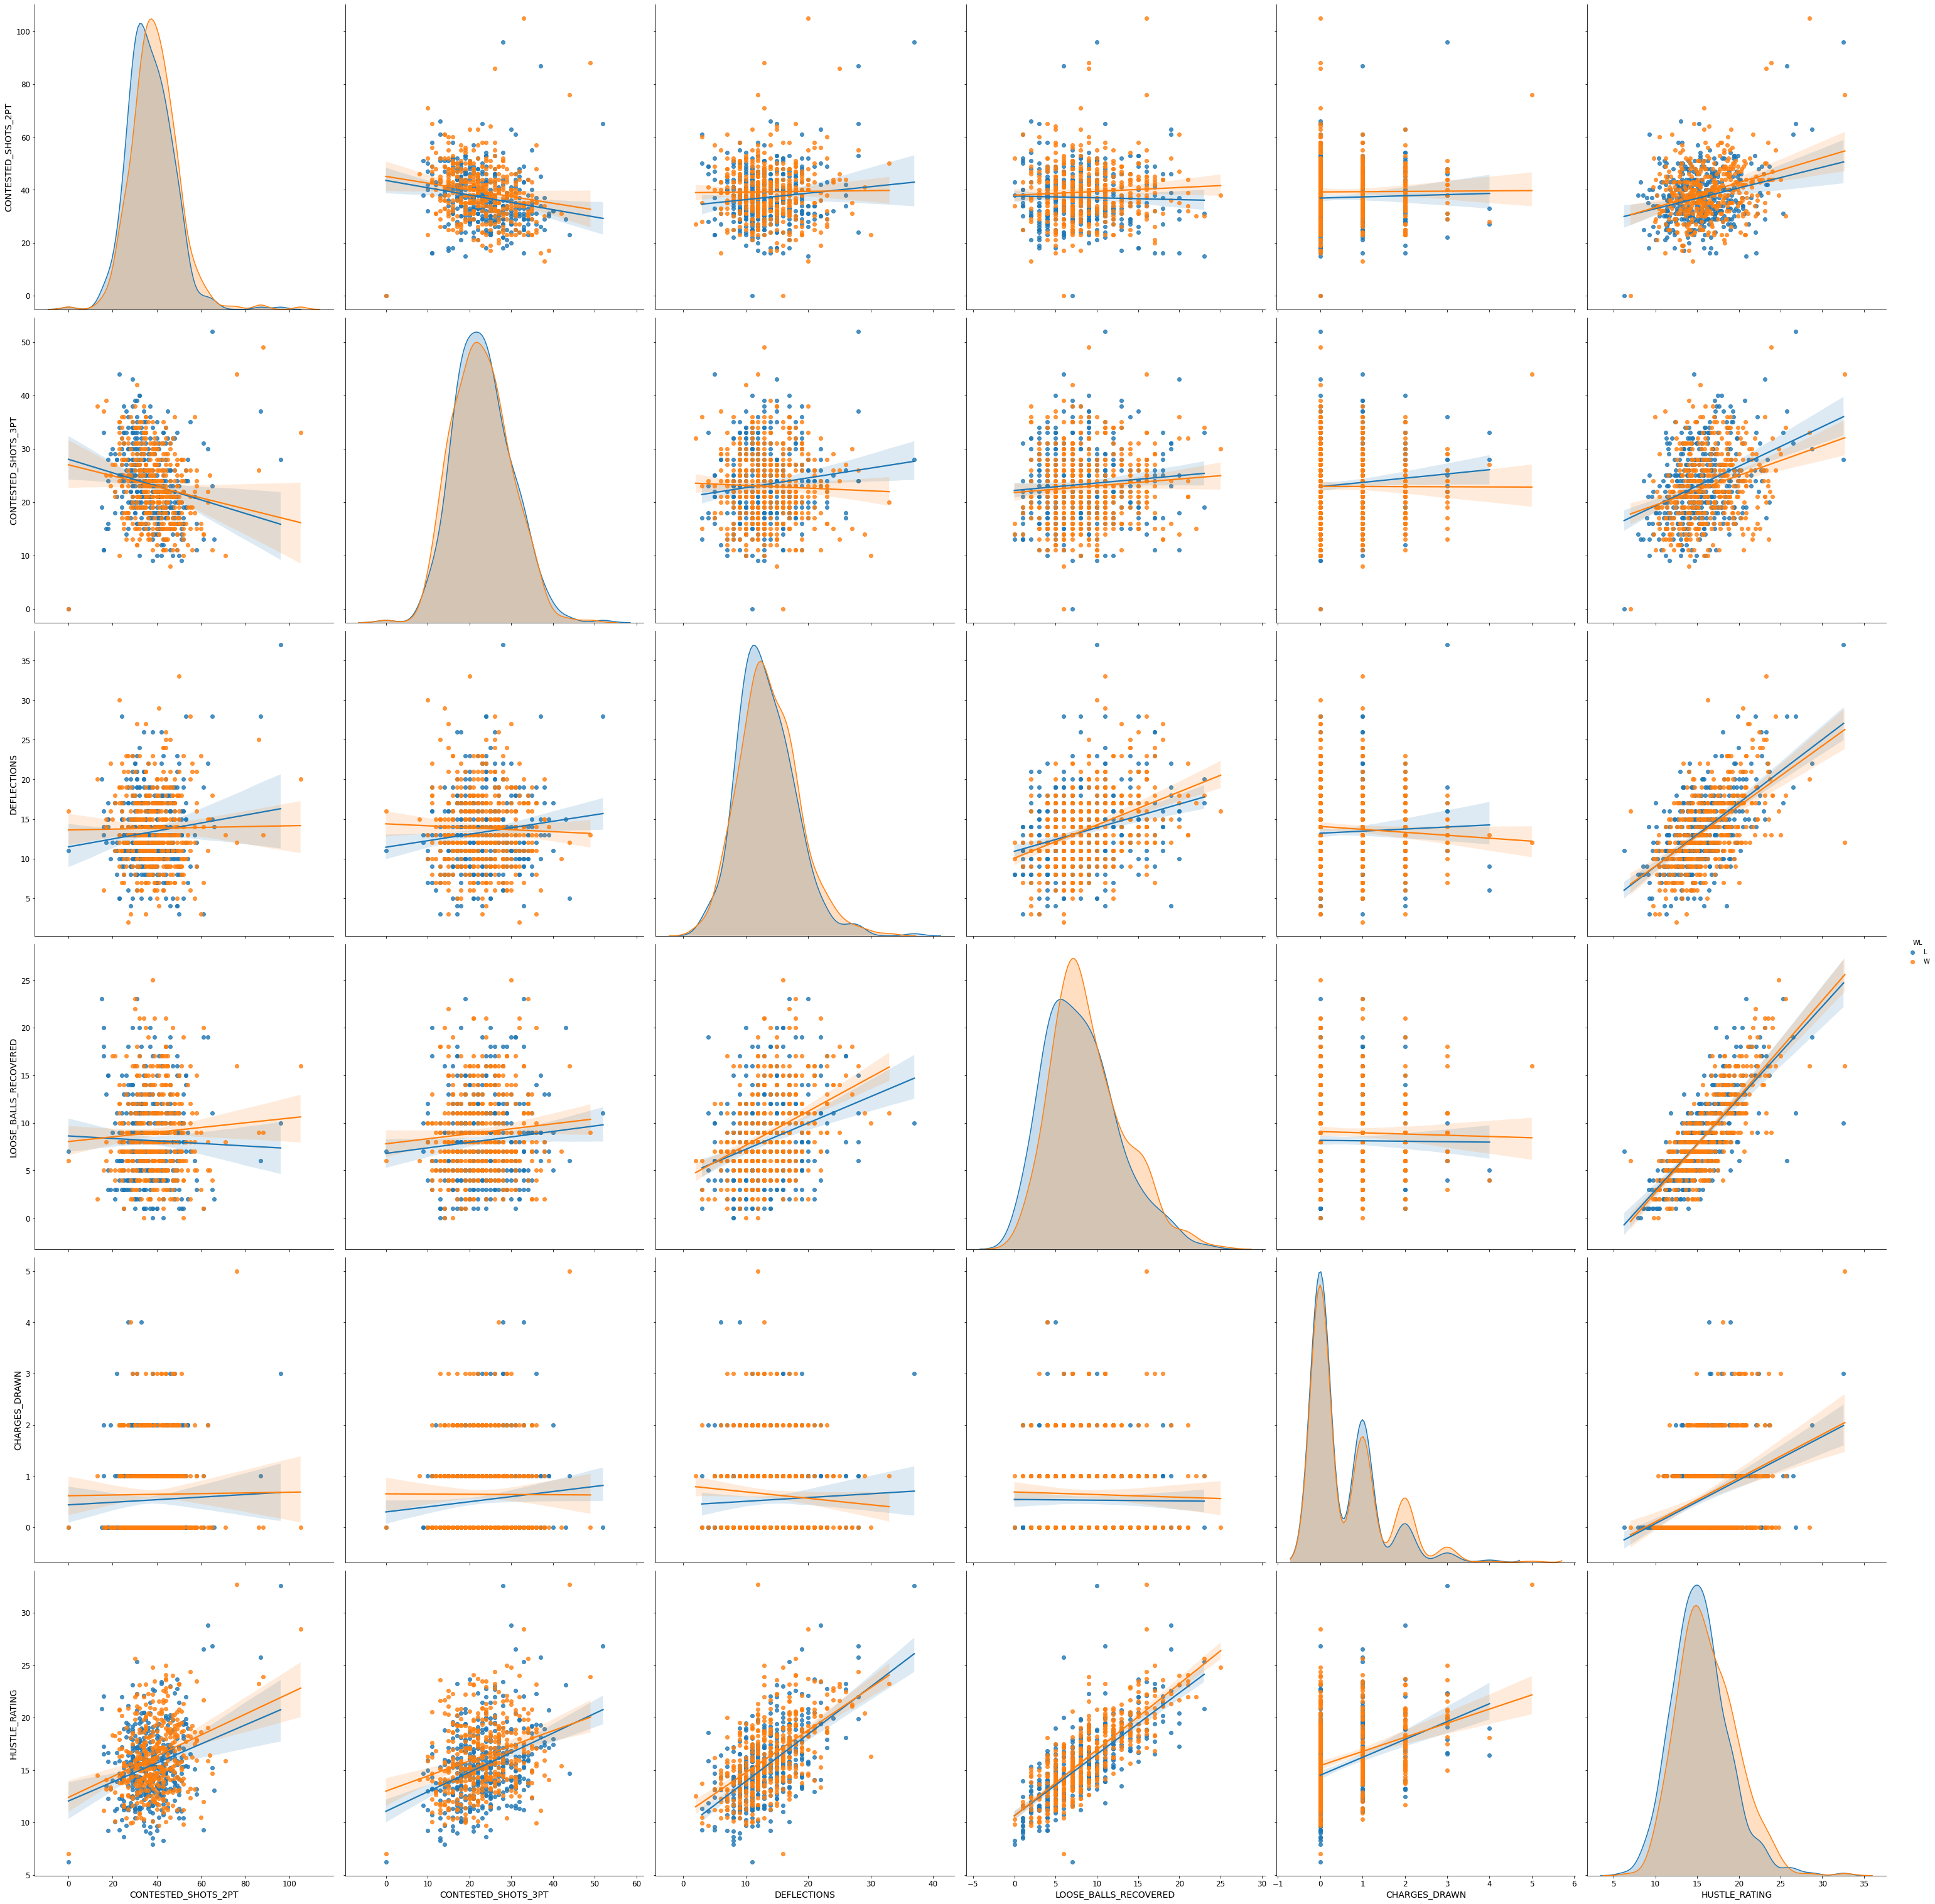

In [17]:
# Pairplot with WL

dataset = hustle_stats[['CONTESTED_SHOTS_2PT','CONTESTED_SHOTS_3PT', 'DEFLECTIONS',
                        'LOOSE_BALLS_RECOVERED', 'CHARGES_DRAWN', 'HUSTLE_RATING', 'WL']]

sns.pairplot(dataset, height=7, kind='reg', hue='WL')

## Scaling and Train Test Split of Dataset

In [19]:
# hustle features for classification model for bubble and prior seasons
features = ['CONTESTED_SHOTS', 'CONTESTED_SHOTS_2PT', 'CONTESTED_SHOTS_3PT',
       'DEFLECTIONS', 'CHARGES_DRAWN', 'SCREEN_ASSISTS', 'SCREEN_AST_PTS',
       'OFF_LOOSE_BALLS_RECOVERED', 'DEF_LOOSE_BALLS_RECOVERED',
       'LOOSE_BALLS_RECOVERED', 'OFF_BOXOUTS', 'DEF_BOXOUTS',
       'BOX_OUT_PLAYER_TEAM_REBS', 'BOX_OUT_PLAYER_REBS', 'BOX_OUTS','HUSTLE_RATING']

X_bubble = bubble_season[features].values

X_prior = prior_seasons[features].values

# encode class values WL as integers
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y_bubble = bubble_season['WL']
encoder.fit(y_bubble)
y_bubble = encoder.transform(y_bubble)

y_prior = prior_seasons['WL']
encoder.fit(y_prior)
y_prior = encoder.transform(y_prior)

In [21]:
from sklearn.model_selection import train_test_split
X_train_bubble, X_test_bubble, y_train_bubble, y_test_bubble = train_test_split(X_bubble, y_bubble, test_size = 0.2, random_state = 0)
X_train_prior, X_test_prior, y_train_prior, y_test_prior = train_test_split(X_prior, y_prior, test_size = 0.2, random_state = 0)

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_bubble = scaler.fit_transform(X_train_bubble)
X_test_bubble = scaler.transform(X_test_bubble)

X_train_prior = scaler.fit_transform(X_train_prior)
X_test_prior = scaler.transform(X_test_prior)

## Logistic Regression Model on Training and Test sets

In [31]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train_bubble, y_train_bubble)

y_train_pred_bubble = classifier.predict(X_train_bubble)
y_test_pred_bubble = classifier.predict(X_test_bubble)

y_train_pred_prior = classifier.predict(X_train_prior)
y_test_pred_prior = classifier.predict(X_test_prior)

# Classification report
from sklearn.metrics import classification_report
target_names = ['Loss', 'Win']
print("Logistic Regression Model Bubble Season:\n", classification_report(y_test_bubble, y_test_pred_bubble, target_names=target_names))

print("Logistic Regression Model Prior Seasons:\n", classification_report(y_test_prior, y_test_pred_prior, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm_bubble = confusion_matrix(y_test_bubble, y_test_pred_bubble)
print("Confusion Matrix Bubble Season:\n",cm_bubble)

cm_prior = confusion_matrix(y_test_prior, y_test_pred_prior)
print("Confusion Matrix Prior Seasons:\n",cm_prior)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv_bubble = cross_val_score(classifier, X_train_bubble, y_train_bubble, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score Bubble Season: ", round(np.mean(cv_bubble),2))

cv_prior = cross_val_score(classifier, X_train_prior, y_train_prior, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score Prior Seasons: ", round(np.mean(cv_prior),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision_bubble = average_precision_score(y_test_bubble, y_test_pred_bubble)
print('\nAverage Precision-Recall Score Bubble Season: {0:0.2f}'.format(
      average_precision_bubble))

average_precision_prior = average_precision_score(y_test_prior, y_test_pred_prior)
print('\nAverage Precision-Recall Score Prior Seasons: {0:0.2f}'.format(
      average_precision_prior))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp_bubble = plot_precision_recall_curve(classifier, X_test_bubble, y_test_bubble)
disp_bubble.ax_.set_title('\n2-class Precision-Recall Curve Bubble Season: '
                   'AP={0:0.2f}'.format(average_precision_bubble))

disp_prior = plot_precision_recall_curve(classifier, X_test_prior, y_test_prior)
disp_prior.ax_.set_title('\n2-class Precision-Recall Curve Prior Seasons: '
                   'AP={0:0.2f}'.format(average_precision_prior))

Logistic Regression Model Bubble Season:
               precision    recall  f1-score   support

        Loss       0.75      0.60      0.67        20
         Win       0.56      0.71      0.63        14

    accuracy                           0.65        34
   macro avg       0.65      0.66      0.65        34
weighted avg       0.67      0.65      0.65        34

Logistic Regression Model Prior Seasons:
               precision    recall  f1-score   support

        Loss       0.63      0.70      0.67        71
         Win       0.60      0.52      0.56        61

    accuracy                           0.62       132
   macro avg       0.62      0.61      0.61       132
weighted avg       0.62      0.62      0.62       132

Confusion Matrix Bubble Season:
 [[12  8]
 [ 4 10]]
Confusion Matrix Prior Seasons:
 [[50 21]
 [29 32]]

Average Cross Validation Score Bubble Season:  0.59

Average Cross Validation Score Prior Seasons:  0.58

Average Precision-Recall Score Bubble Season: 0.51


ImportError: cannot import name 'plot_precision_recall_curve' from 'sklearn.metrics' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

## Schochastic Gradient Decent Classifier Model

In [23]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(max_iter=1000, tol=1e-3, random_state=0)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['Loss', 'Win']
print("Schochastic Gradient Decent Classifier Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision_bubble = average_precision_score(y_test_bubble, y_test_pred_bubble)
print('\nAverage Precision-Recall Score Bubble Season: {0:0.2f}'.format(
      average_precision_bubble))

average_precision_prior = average_precision_score(y_test_prior, y_test_pred_prior)
print('\nAverage Precision-Recall Score Prior Seasons: {0:0.2f}'.format(
      average_precision_prior))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp_bubble = plot_precision_recall_curve(classifier, X_test_bubble, y_test_bubble)
disp_bubble.ax_.set_title('\n2-class Precision-Recall Curve Bubble Season: '
                   'AP={0:0.2f}'.format(average_precision_bubble))

disp_prior = plot_precision_recall_curve(classifier, X_test_prior, y_test_prior)
disp_prior.ax_.set_title('\n2-class Precision-Recall Curve Prior Seasons: '
                   'AP={0:0.2f}'.format(average_precision_prior))



NameError: name 'X_train' is not defined

## KNN Classification Model

KNeighborsClassifier Model:
               precision    recall  f1-score   support

        Loss       0.52      0.58      0.55        84
         Win       0.50      0.43      0.46        81

    accuracy                           0.51       165
   macro avg       0.51      0.51      0.51       165
weighted avg       0.51      0.51      0.51       165

Confusion Matrix:
 [[49 35]
 [46 35]]

Average Cross Validation Score:  0.54

Average Precision-Recall Score: 0.49


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.49')

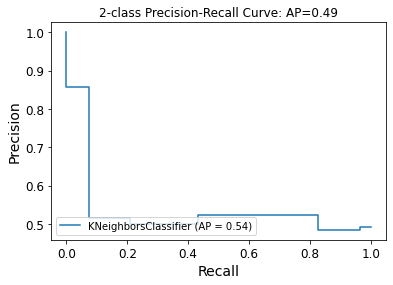

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['Loss', 'Win']
print("KNeighborsClassifier Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Support Vector Machine Classification Model

Support Vector Machine Classification Model:
               precision    recall  f1-score   support

        Loss       0.56      0.55      0.55        84
         Win       0.54      0.56      0.55        81

    accuracy                           0.55       165
   macro avg       0.55      0.55      0.55       165
weighted avg       0.55      0.55      0.55       165

Confusion Matrix:
 [[46 38]
 [36 45]]

Average Cross Validation Score:  0.58

Average Precision-Recall Score: 0.52


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.52')

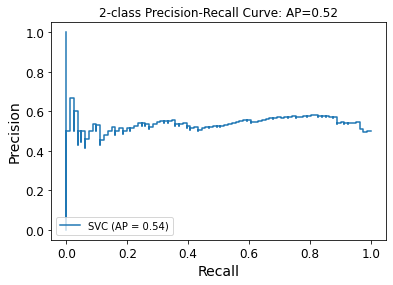

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['Loss', 'Win']
print("Support Vector Machine Classification Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Naive Bayes Classification Model

Naive Bayes Classification Model:
               precision    recall  f1-score   support

        Loss       0.56      0.65      0.60        84
         Win       0.56      0.46      0.50        81

    accuracy                           0.56       165
   macro avg       0.56      0.56      0.55       165
weighted avg       0.56      0.56      0.55       165

Confusion Matrix:
 [[55 29]
 [44 37]]

Average Cross Validation Score:  0.59

Average Precision-Recall Score: 0.52


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.52')

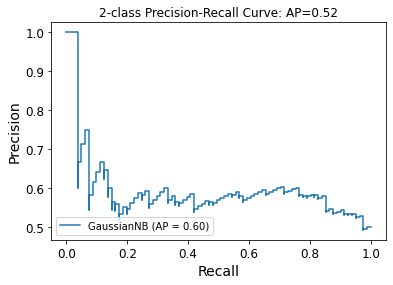

In [34]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['Loss', 'Win']
print("Naive Bayes Classification Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))

## Random Forest Classification Model

Random Forest Classification Model:
               precision    recall  f1-score   support

        Loss       0.53      0.60      0.56        84
         Win       0.52      0.46      0.49        81

    accuracy                           0.53       165
   macro avg       0.53      0.53      0.52       165
weighted avg       0.53      0.53      0.53       165

Confusion Matrix:
 [[50 34]
 [44 37]]

Average Cross Validation Score:  0.56

Average Precision-Recall Score: 0.50


Text(0.5, 1.0, '2-class Precision-Recall Curve: AP=0.50')

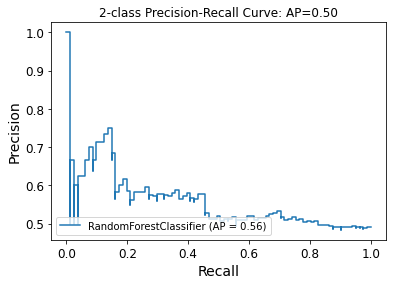

In [35]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_train_pred = classifier.predict(X_train)
y_test_pred = classifier.predict(X_test)

# Classification report
from sklearn.metrics import classification_report
target_names = ['Loss', 'Win']
print("Random Forest Classification Model:\n", classification_report(y_test, y_test_pred, target_names=target_names))

# Confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n",cm)

# Average Cross Validation Score
from sklearn.model_selection import cross_val_score
cv = cross_val_score(classifier, X_train, y_train, cv=10, scoring="accuracy")
print("\nAverage Cross Validation Score: ", round(np.mean(cv),2))

# Average Precision Score and Precision-Recall curve
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, y_test_pred)
print('\nAverage Precision-Recall Score: {0:0.2f}'.format(
      average_precision))

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall Curve: '
                   'AP={0:0.2f}'.format(average_precision))